In [1]:
from matplotlib import pyplot as plt
from skimage import morphology
from scipy.spatial import distance_matrix
import numpy as np
from itertools import product
from scipy.ndimage.morphology import distance_transform_cdt
from urban_growth.city_model_2 import *
%matplotlib inline

# Generate Existing Settlements

In [6]:
L = 200
nseeds = 24000

M = np.zeros((L,L))
if nseeds > 1:
    ivec = np.random.randint(0, L, nseeds)
    jvec = np.random.randint(0, L, nseeds)
    M[ivec,jvec] = 1
else:
    M[1.0 * L/2,1.0 * L/2] = 1

# Classify Existing Settlements

In [7]:
rural, urban, unsettled = settlement_types(M, 
                                return_type = 'cell', 
                                thresh = 10, 
                                connectivity = 1)

In [8]:
types = np.zeros(M.shape)

for i in range(urban.shape[0]):
    types[tuple(urban[i,])] = 1
for i in range(rural.shape[0]):
    types[tuple(rural[i,])] = -1

# Compute Distances

Note: this is still pretty expensive, but should work up to L = 500 or so on the server. 

In [12]:
dists = get_dists(M, thresh = 10, connectivity = 1)

In [21]:
weights_rural, weights_urban = distance_weights(M,
                                                dists, 
                                                gamma_r = 1.3, 
                                                gamma_u = 2.0, 
                                                thresh = 10, 
                                                connectivity = 1)

# Quick viz

Original matrix, classified settlements, 

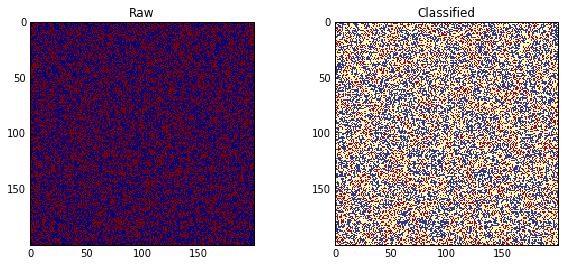

In [25]:
fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(121)
ax1.imshow(M, interpolation = 'nearest')
plt.title('Raw')

ax2 = fig.add_subplot(122)
ax2.imshow(types, interpolation = 'nearest', cmap = 'RdYlBu')
plt.title('Classified')

The plots below give the distance weights, i.e. sums of the form $\sum_{j \in \mathcal{W}_r(t)} d_{jk}^{-\gamma_r}$. These get plugged in as features to e.g. the logistic classification model. In this example we've used $\gamma_r < \gamma_u$, which is reflected by the fact that the urban distance weights are much more localized in space than their rural counterparts.  

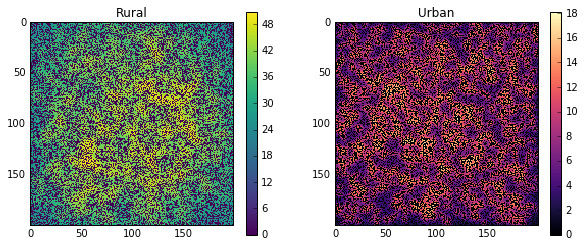

In [26]:
fig = plt.figure(figsize = (10, 4))

ax3 = fig.add_subplot(121)
im = ax3.imshow(weights_rural, cmap = 'viridis', interpolation = 'nearest')
plt.colorbar(im)
plt.title('Rural')

ax4 = fig.add_subplot(122)
im = ax4.imshow(weights_urban, cmap = 'magma', interpolation = 'nearest')
plt.colorbar(im)
plt.title('Urban')